## Student Performance Factors Analysis

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder

In [3]:
# dataset https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
df = pd.read_csv('StudentPerformanceFactors.csv')

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
# according to the empirical rule the missing values are less than 5% 
# then the values can be ignored
df.isna().sum() / len(df) * 100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

### Derscriptive Stats

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [8]:
df.duplicated().sum() # no duplicate values

0

In [9]:
df.dtypes # the datatypes are correct

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [10]:
for col in df:
    print(df[col].value_counts())
    print('------------------------------')

Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
6      17
4      17
3      12
36     11
38      7
39      7
37      6
2       6
1       3
43      1
44      1
Name: count, dtype: int64
------------------------------
Attendance
67     190
98     187
76     185
77     184
64     182
94     180
84     175
79     175
91     175
82     173
68     170
69     170
80     169
81     168
96     168
73     168
93     167
72     167
74     165
78     165
61     164
95     163
89     162
71     162
97     161
70     161
65     158
83     157
90     156
88     155
63     155
99     154
92     154
62     152
86     151
87     151
75     149
85     146
66     145
60      87
100     81
Name: count, dtype: int64
------------------------------


<Axes: xlabel='Hours_Studied'>

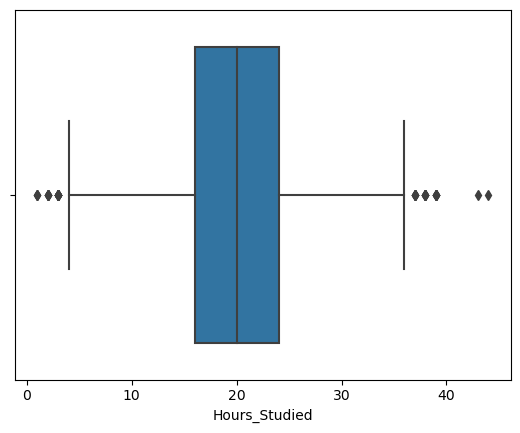

In [11]:
sns.boxplot(data=df, x='Hours_Studied') 
# these outliers are necessary in the students data and are not a cause of error.

### Univariate Analysis

Visualization

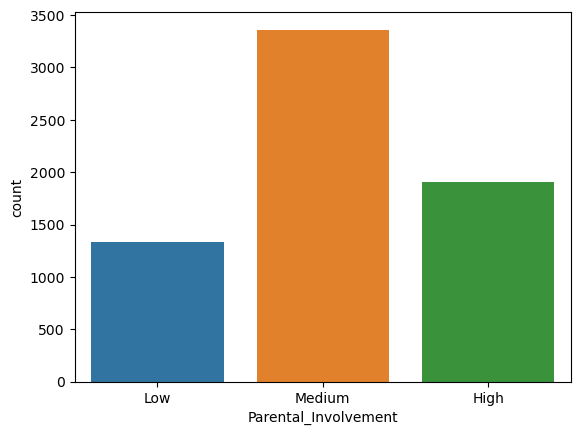

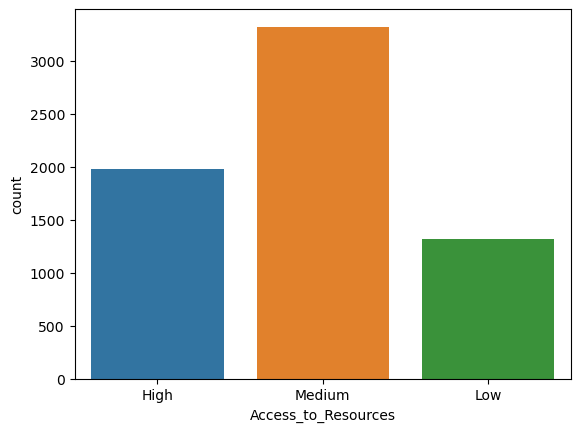

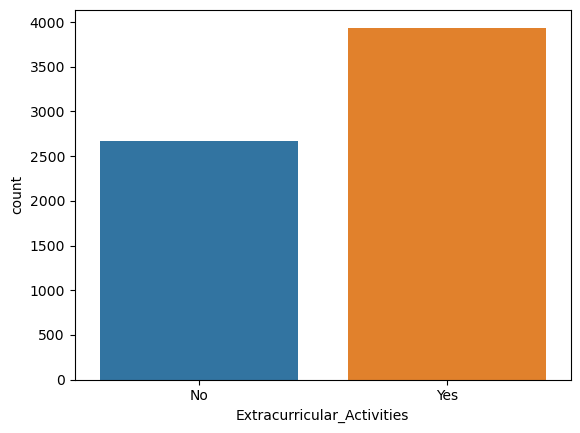

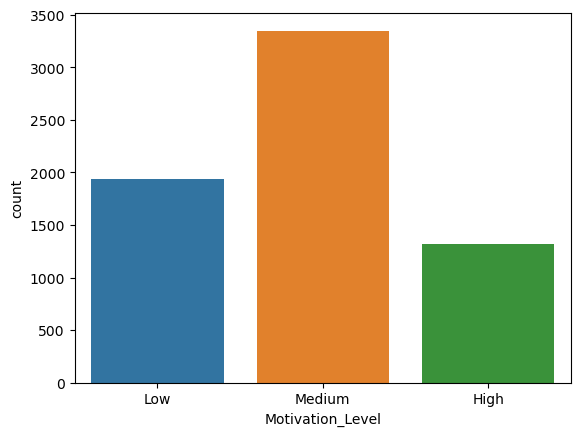

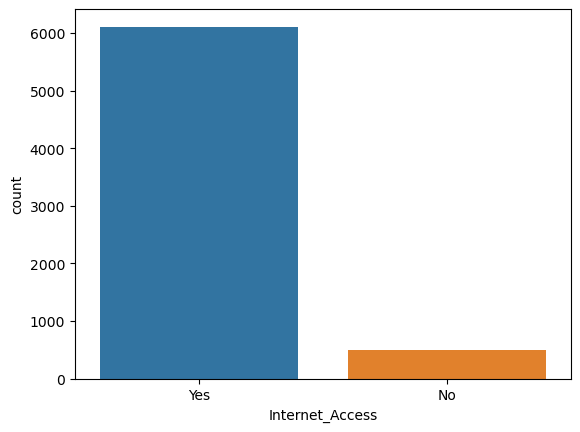

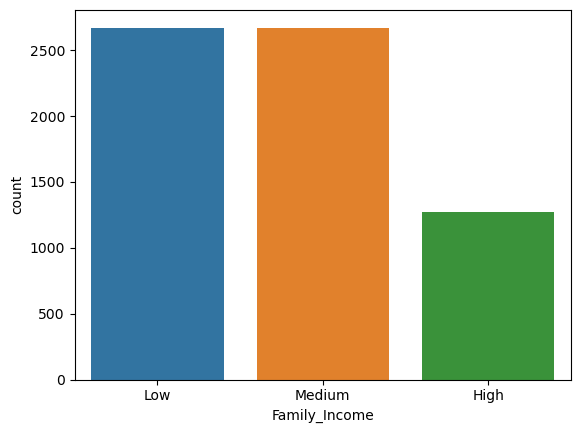

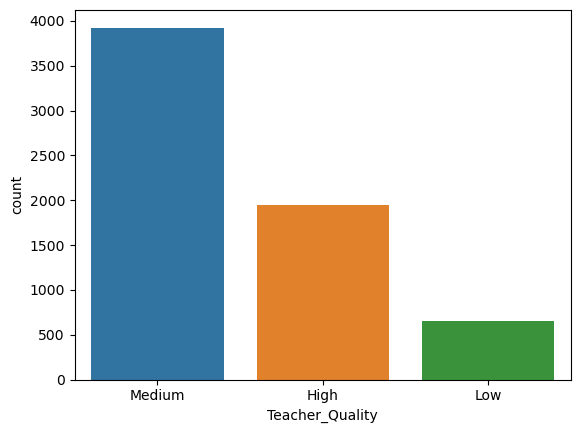

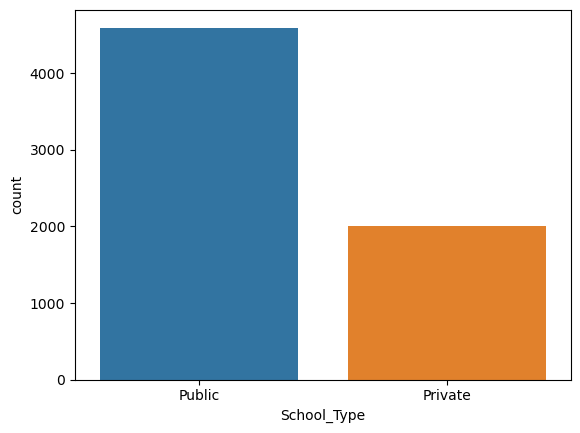

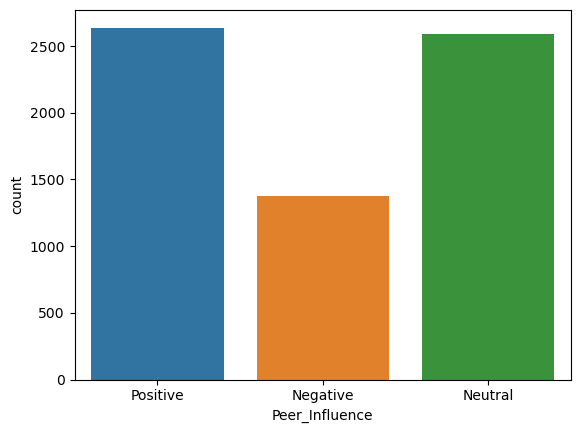

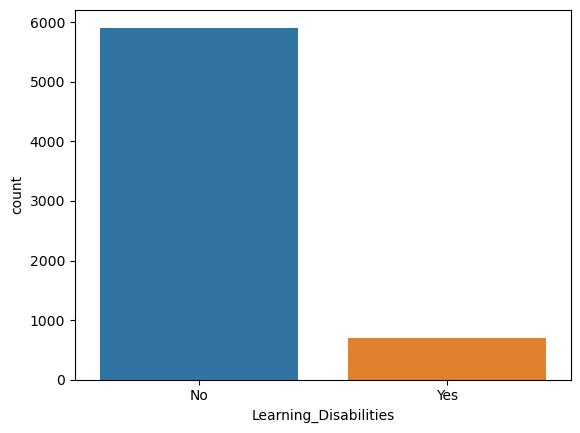

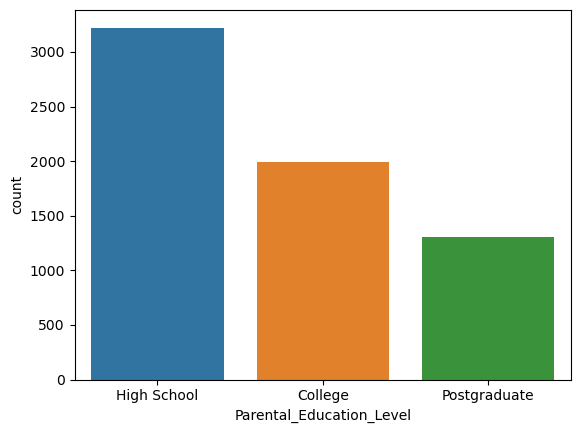

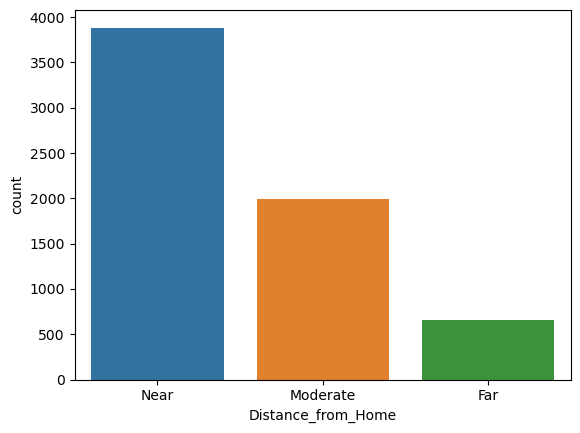

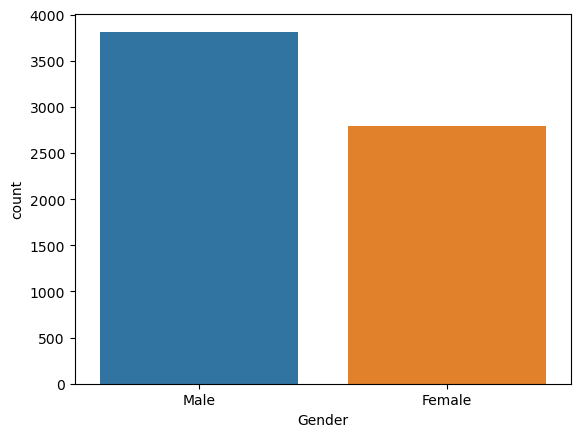

In [12]:
# Countplot for categorical data
df_string = df.select_dtypes(include=['object'])
for col in df_string:
    sns.countplot(x=col, data=df_string)
    plt.show()

In [13]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

### Bivariate Analysis

Major Factors vs Exam Score

c:\Users\hsman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


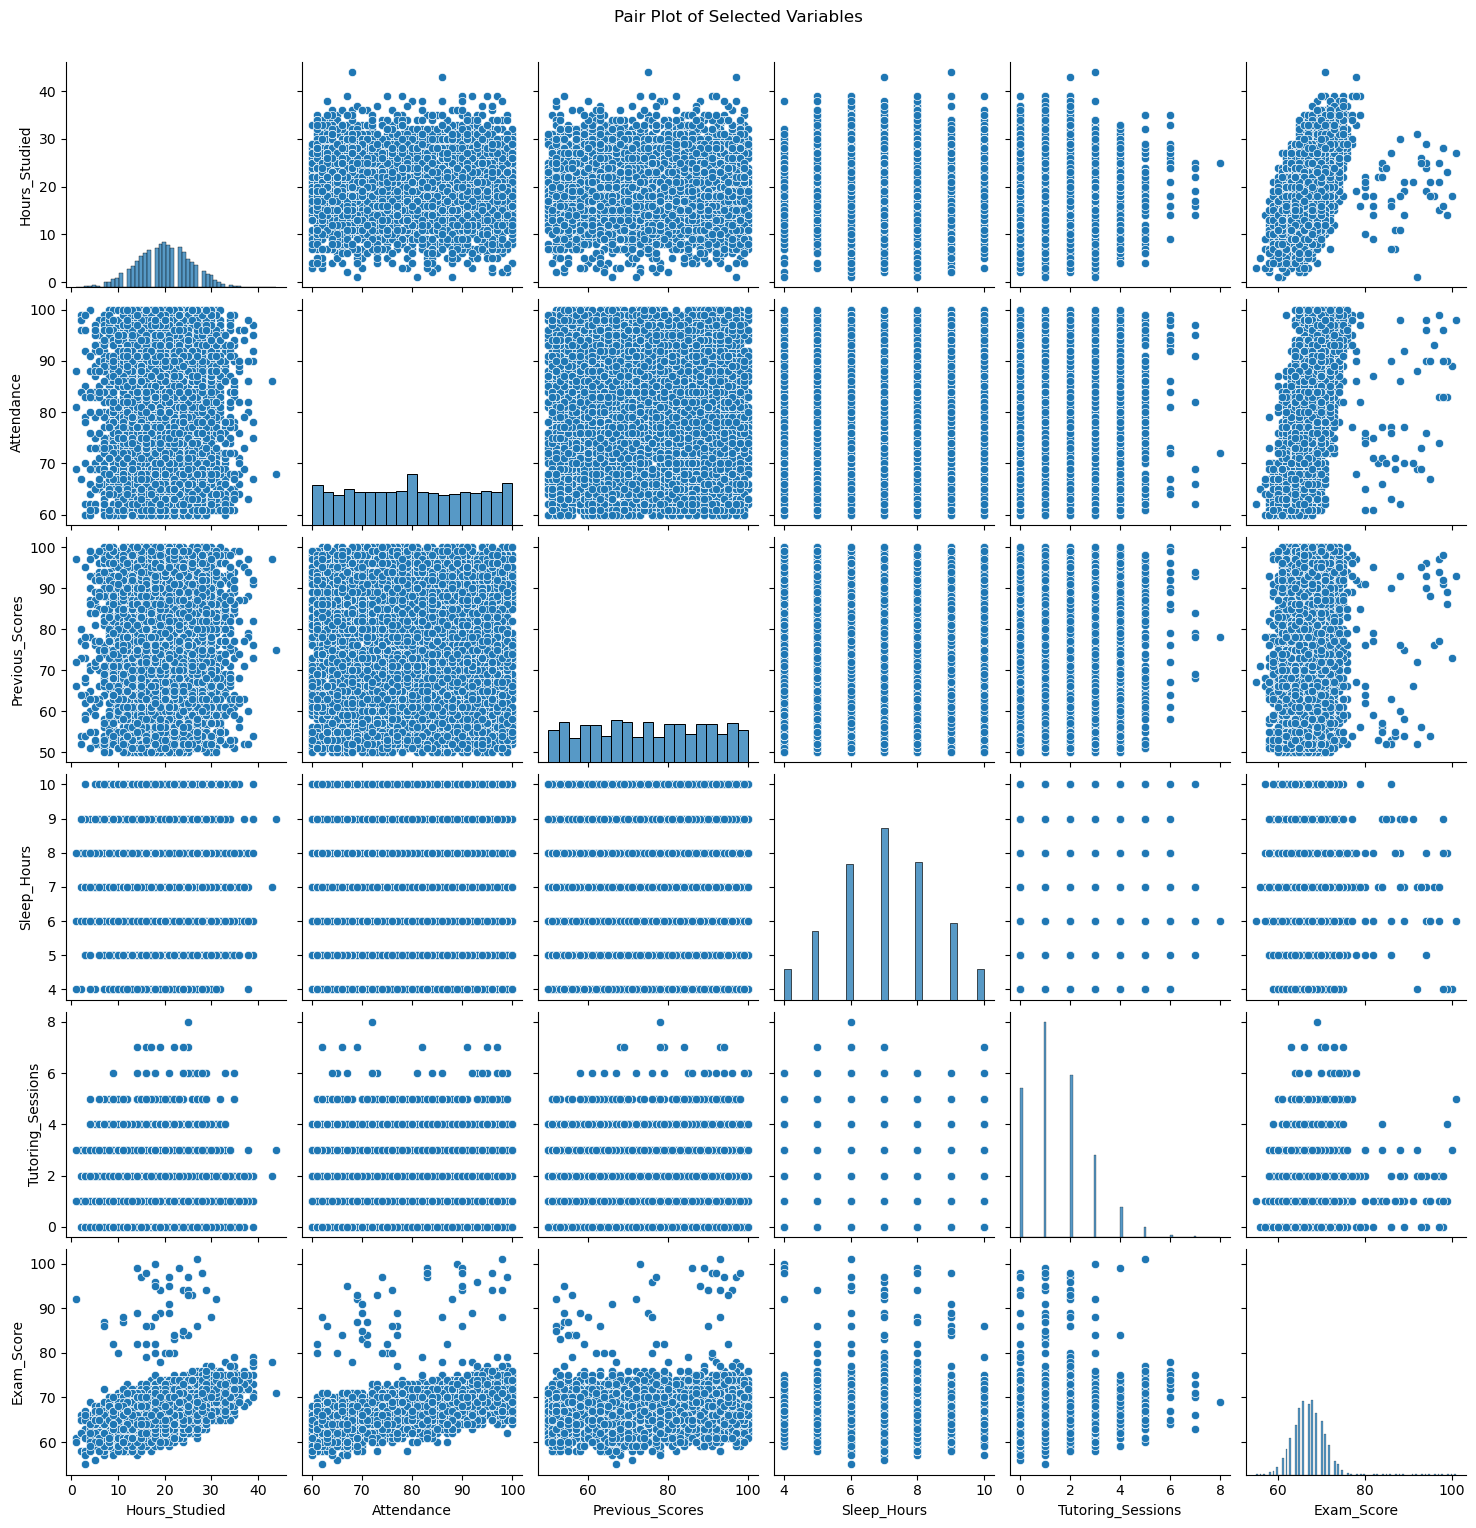

In [17]:
selected_columns = ['Hours_Studied', 'Attendance','Previous_Scores','Sleep_Hours','Tutoring_Sessions', 'Exam_Score']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

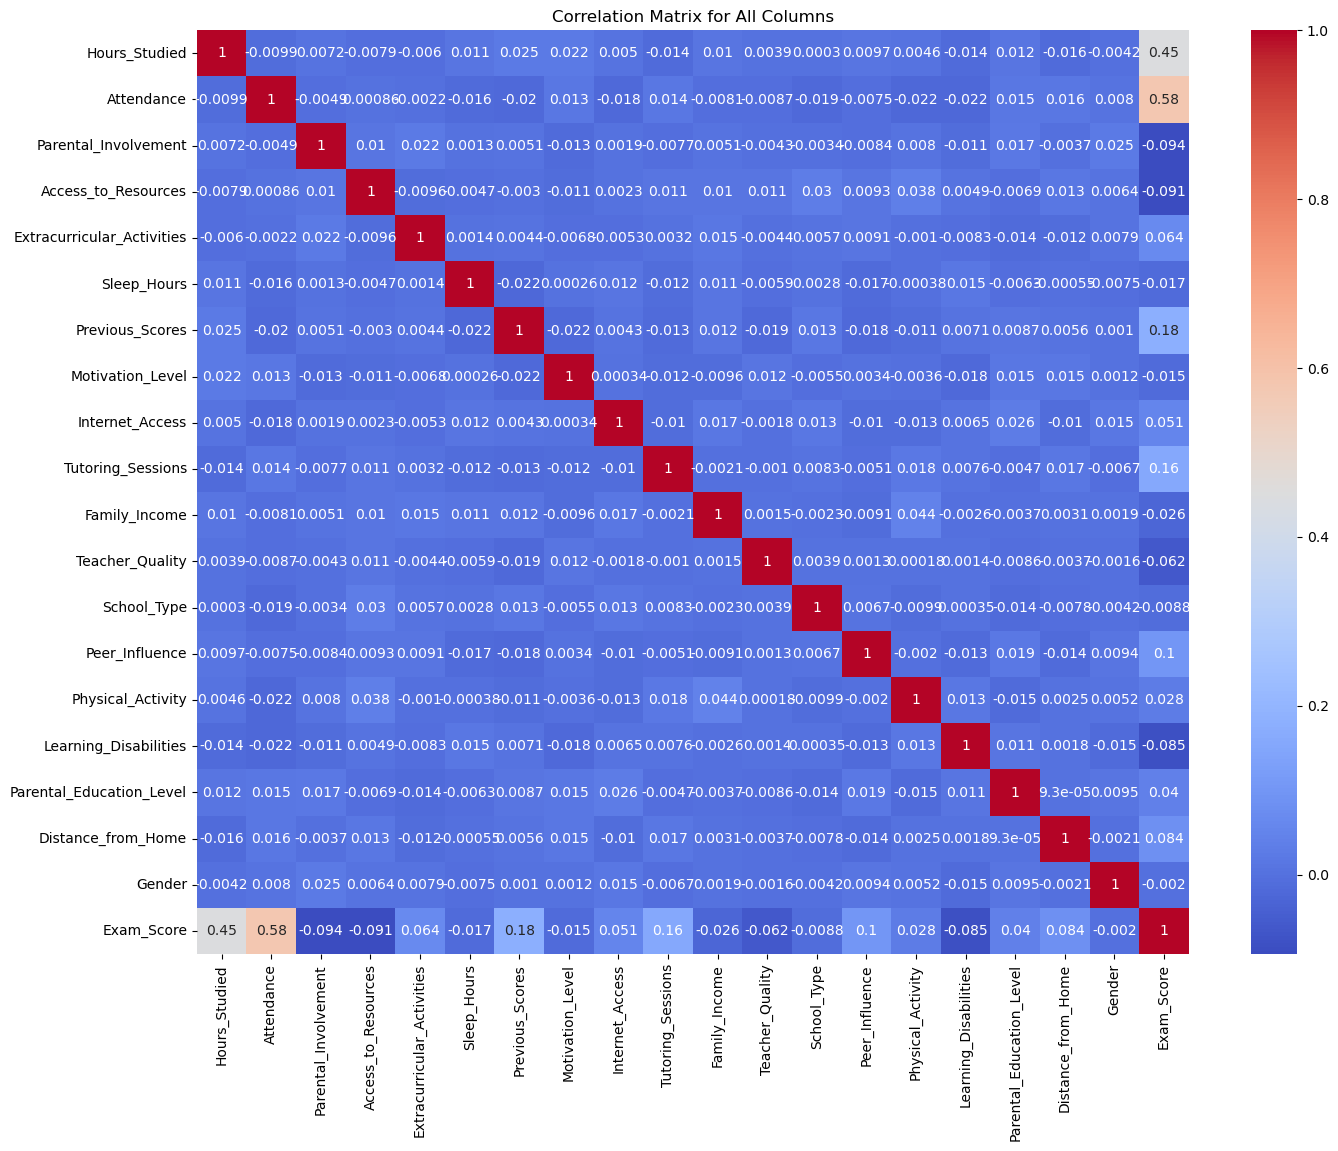

In [51]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical variables to numerical (using one-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for All Columns')
plt.show()

# label_encoders = {}
# for column in categorical_columns:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le


# plt.figure(figsize=(16, 12))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.show()

Distribution of Exam scores

mean of exam score: 67.23565914938702
median of exam score: 67.0
variance of exam score: 15.135646185952833
std dev of exam score: 3.890455781261732


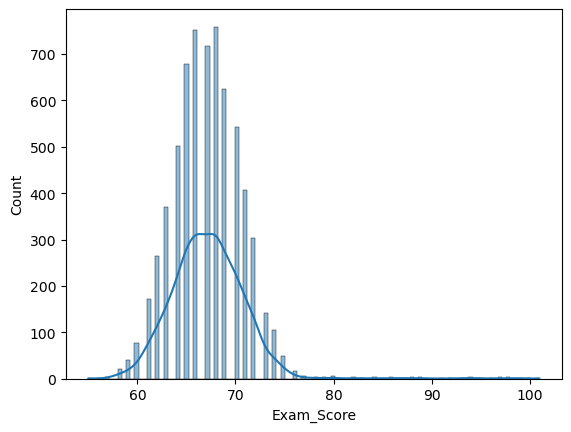

In [18]:
sns.histplot(data=df, x='Exam_Score', kde=True) # right skewed
exam_score_mean = df['Exam_Score'].mean()
exam_score_median = df['Exam_Score'].median()
exam_score_variance = statistics.variance(df['Exam_Score'])
exam_score_std = statistics.stdev(df['Exam_Score'])
print('mean of exam score:',exam_score_mean) 
print('median of exam score:',exam_score_median) # mean is greater than median
print('variance of exam score:',exam_score_variance)
print('std dev of exam score:',exam_score_std)

### Student Behavior factors

Impact of Study Time on Exam_Score

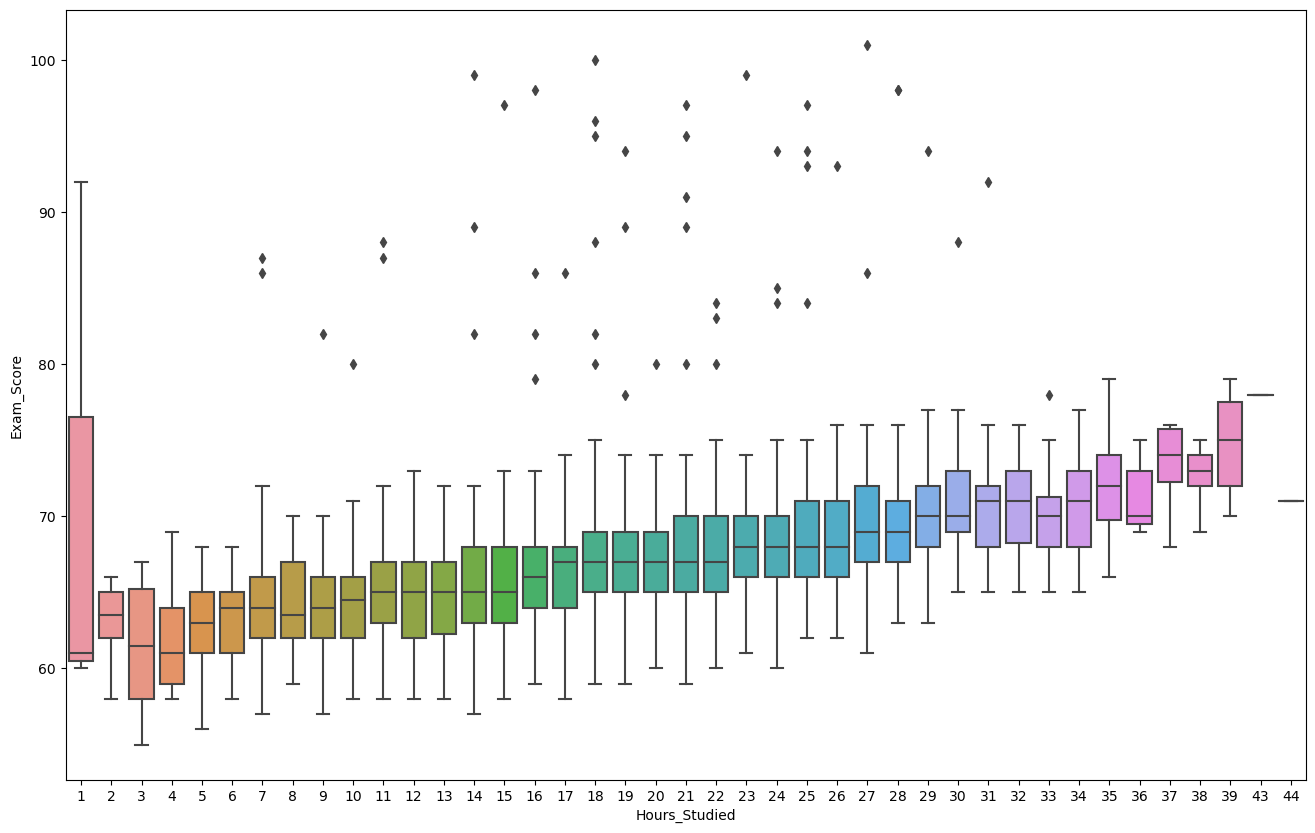

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

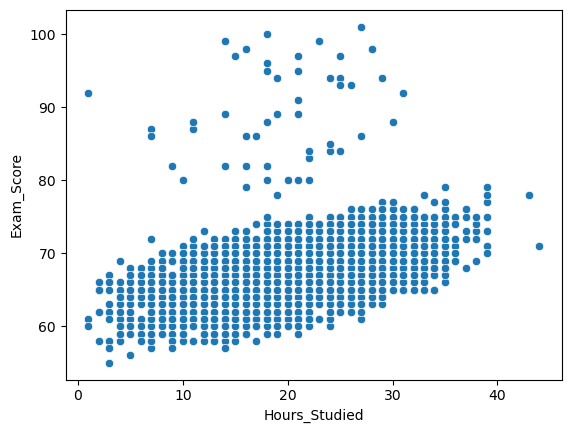

In [19]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.show()
sns.scatterplot(data=df,x='Hours_Studied',y='Exam_Score')

Effect of Extracurricular Activities

In [21]:
df['Extracurricular_Activities'].value_counts()

Extracurricular_df_yes = df[df['Extracurricular_Activities'] == 'Yes']

In [22]:
# stats for student scores taking part in extracurricular activities
print(statistics.mean(Extracurricular_df_yes['Exam_Score']))
print(statistics.median(Extracurricular_df_yes['Exam_Score']))
print(statistics.variance(Extracurricular_df_yes['Exam_Score']))
print(statistics.stdev(Extracurricular_df_yes['Exam_Score']))

67.44184865413915
67.0
15.54614766111198
3.942860340046548


Text(0.5, 1.0, 'Extra Curricular actitvites vs Exam Scores')

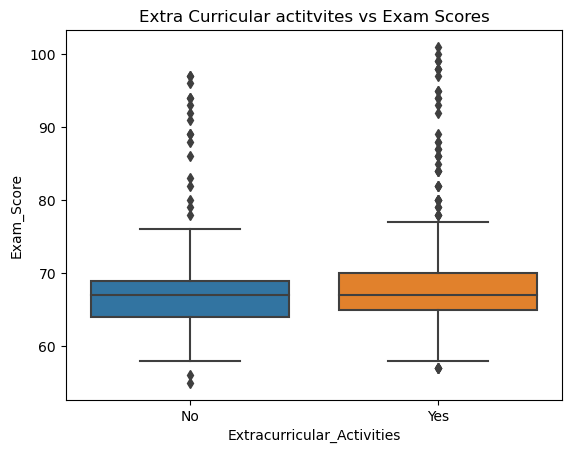

In [23]:
sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score')
plt.title('Extra Curricular actitvites vs Exam Scores')

### Family Factors

 Influence of Parental Education Level

<Axes: xlabel='Parental_Education_Level', ylabel='Exam_Score'>

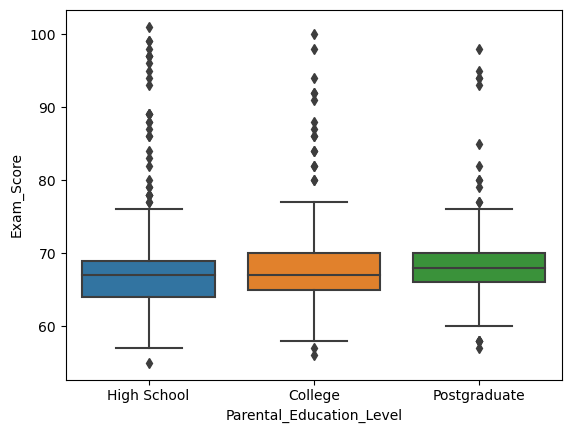

In [20]:
sns.boxplot(data=df, x='Parental_Education_Level', y='Exam_Score')

Parental Invovlement in Student's Education

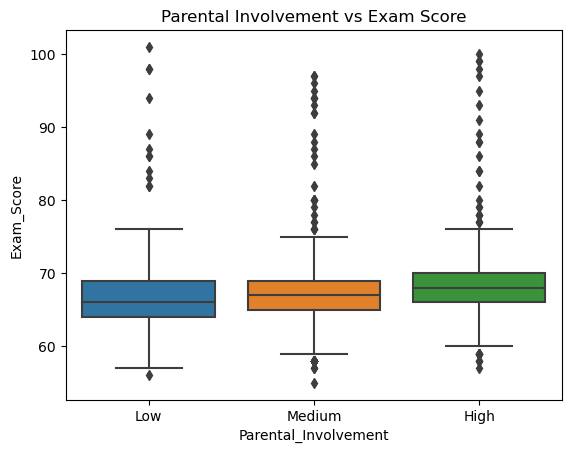

In [21]:
sns.boxplot(data=df, x='Parental_Involvement', y='Exam_Score')
plt.title('Parental Involvement vs Exam Score')
plt.show()

<Figure size 1200x800 with 0 Axes>

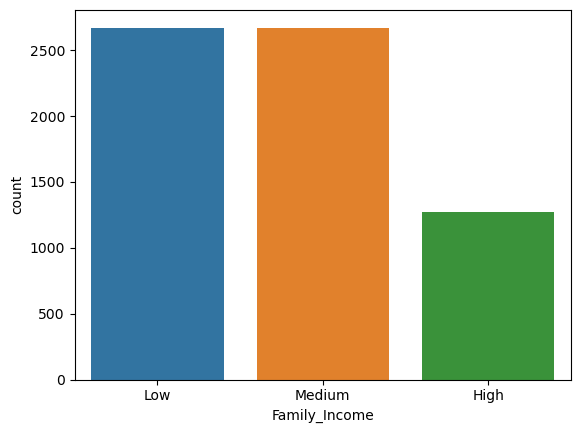

<Figure size 1200x800 with 0 Axes>

In [25]:
sns.countplot(x='Family_Income', data=df_string)

plt.figure(figsize=(12,8))


Family Income affecting the Exam Scores

<Axes: xlabel='Family_Income', ylabel='Exam_Score'>

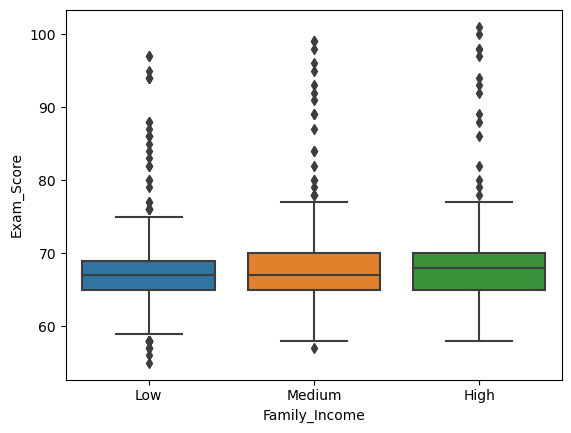

In [28]:
sns.boxplot(data=df, x='Family_Income', y='Exam_Score')

### Personal Factors

Comparison by Gender

In [24]:
df['Gender'].value_counts() / df['Gender'].value_counts().sum() * 100

Gender
Male      57.726654
Female    42.273346
Name: count, dtype: float64

In [25]:
# exam score stats for male students
print(statistics.mean(df[df['Gender'] == 'Male']['Exam_Score']))
print(statistics.median(df[df['Gender'] == 'Male']['Exam_Score']))
print(statistics.variance(df[df['Gender'] == 'Male']['Exam_Score']))
print(statistics.stdev(df[df['Gender'] == 'Male']['Exam_Score']))

67.22889355007865
67.0
14.185464445523559
3.7663595746454637


<Axes: xlabel='Exam_Score', ylabel='Count'>

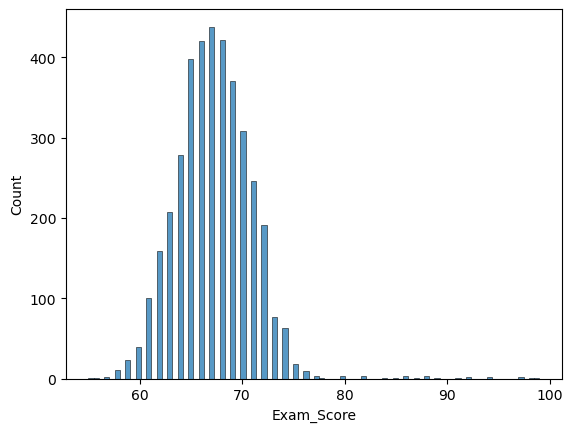

In [26]:
sns.histplot(data=df[df['Gender'] == 'Male'], x='Exam_Score')

In [27]:
# exam score stats for female students
print(statistics.mean(df[df['Gender'] == 'Female']['Exam_Score']))
print(statistics.median(df[df['Gender'] == 'Female']['Exam_Score']))
print(statistics.variance(df[df['Gender'] == 'Female']['Exam_Score']))
print(statistics.stdev(df[df['Gender'] == 'Female']['Exam_Score']))

67.24489795918367
67
16.438570843810304
4.0544507450221055


<Axes: xlabel='Exam_Score', ylabel='Count'>

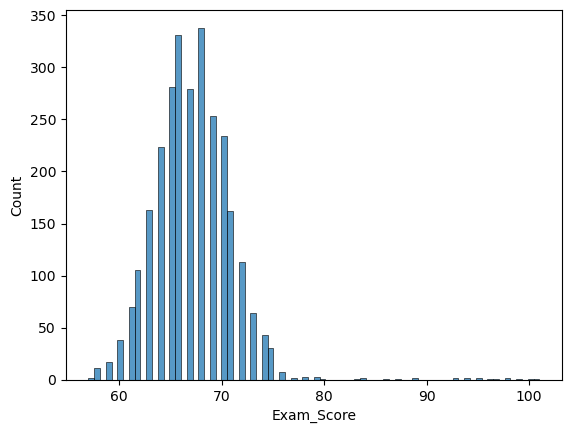

In [28]:
sns.histplot(data=df[df['Gender'] == 'Female'], x='Exam_Score')

<Axes: xlabel='Gender', ylabel='Exam_Score'>

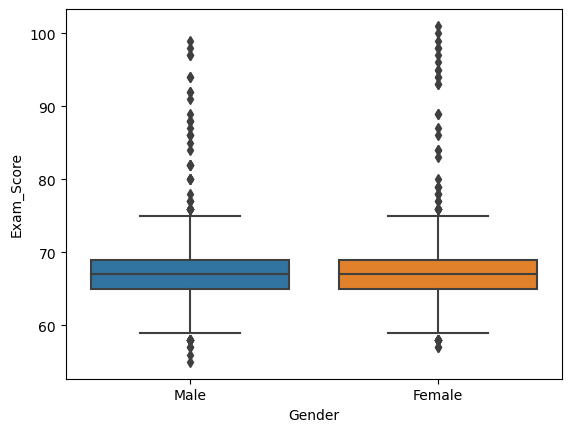

In [29]:
sns.boxplot(data=df, x='Gender', y='Exam_Score')

Motivational Level and Teacher quality

In [30]:
pivot = df.pivot_table(values='Exam_Score', index='Motivation_Level', columns='Teacher_Quality', aggfunc='mean')
print(pivot)

Teacher_Quality        High        Low     Medium
Motivation_Level                                 
High              68.283951  67.029851  67.552803
Low               67.335052  65.948718  66.572890
Medium            67.628125  66.994550  67.254912


<Axes: xlabel='Teacher_Quality', ylabel='Motivation_Level'>

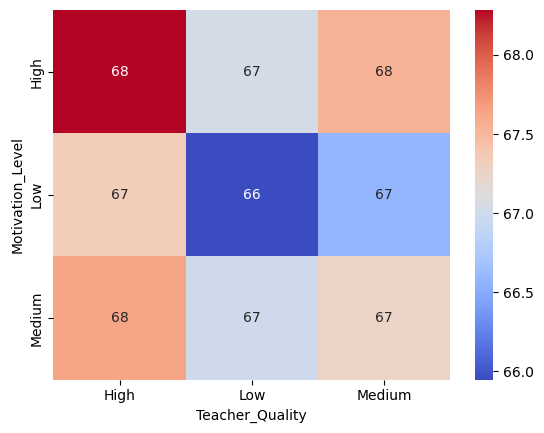

In [31]:
sns.heatmap(pivot, annot=True, cmap='coolwarm')

Analysis of Failures

<Axes: xlabel='Previous_Scores', ylabel='Count'>

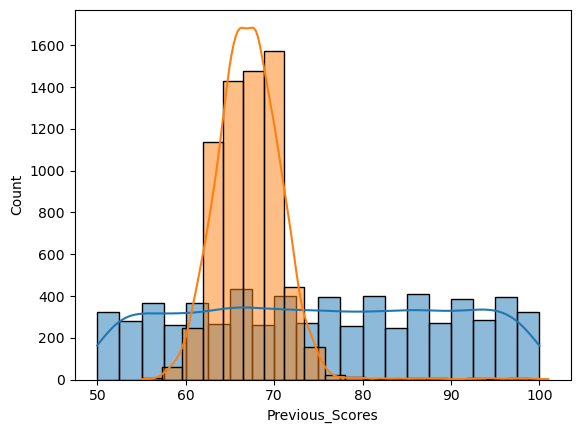

In [34]:
# Previous_Scores
sns.histplot(df['Previous_Scores'], kde=True, bins=20)
sns.histplot(df['Exam_Score'], kde=True, bins=20)

<Axes: xlabel='Previous_Scores', ylabel='Exam_Score'>

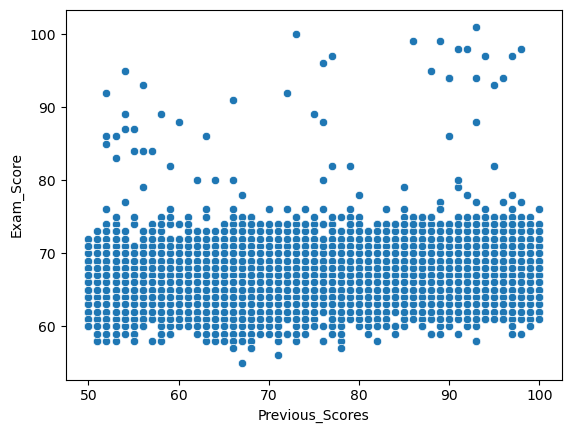

In [35]:
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=df)

<Axes: xlabel='Score_Change', ylabel='Count'>

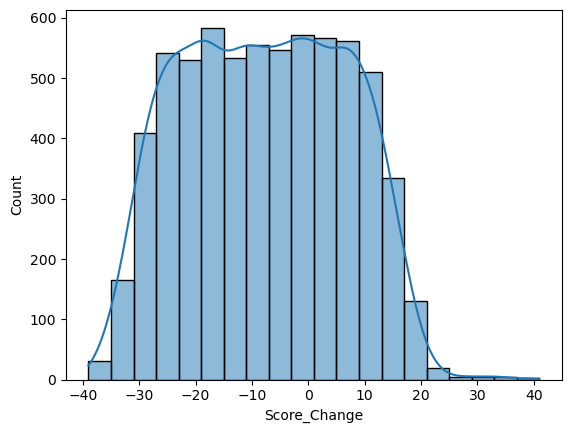

In [36]:
df['Score_Change'] = df['Exam_Score'] - df['Previous_Scores']
sns.histplot(df['Score_Change'], kde=True, bins=20)


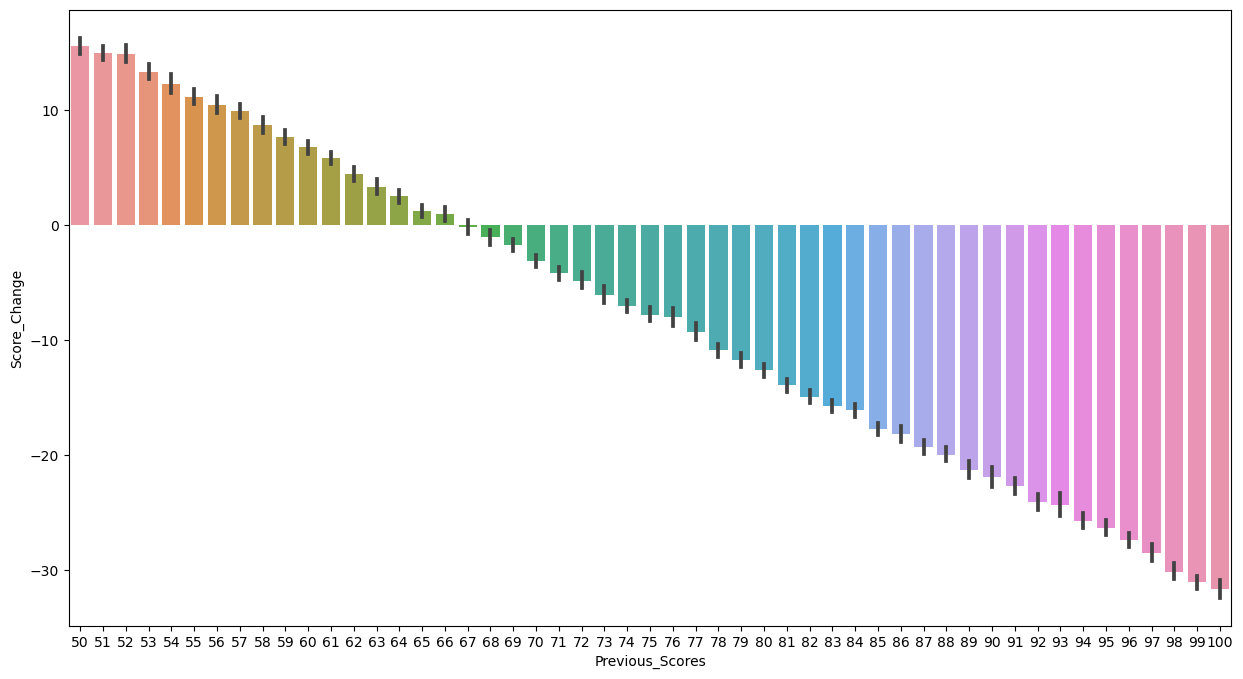

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(x='Previous_Scores', y='Score_Change', data=df)
plt.show()

Infulence of peers

Text(0.5, 1.0, 'Peer Influence Distribution')

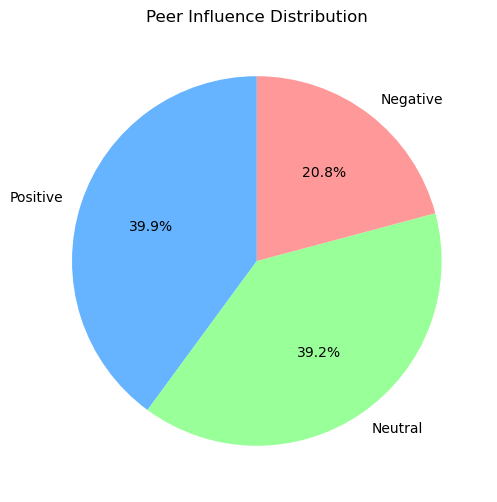

In [39]:
peer_influence_counts = df['Peer_Influence'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(peer_influence_counts, labels=peer_influence_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Peer Influence Distribution')


<Axes: xlabel='Peer_Influence', ylabel='Exam_Score'>

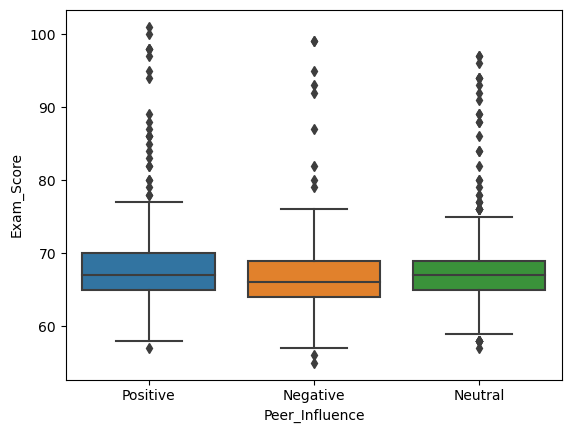

In [40]:
sns.boxplot(data=df, x='Peer_Influence', y='Exam_Score')

<Axes: xlabel='Tutoring_Sessions', ylabel='Exam_Score'>

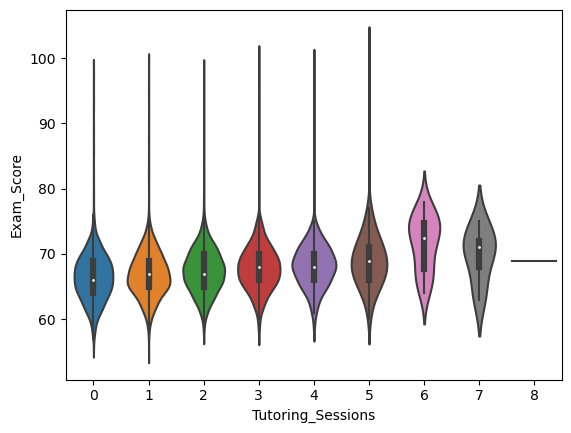

In [44]:
# Tutoring_Sessions
sns.violinplot(x='Tutoring_Sessions', y='Exam_Score', data=df)